In [1]:
#on charge le dataset et on le met dans un dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
df = pd.read_csv('Data.csv', sep=',', low_memory=False)

In [2]:
# On ne peut pas garder toutes les colonnes, un choix s'opère donc. 

# Nous scindons les colonnes restantes dans plusieurs dataframes :

# Data, dataframe général, possédant "eventid","iyear","imonth","iday","extended","resolution","country_txt","region_txt","provstate","city","success", "suicide","attacktype1_txt", "targtype1_txt","targsubtype1_txt","natlty1_txt","gname","nperps","claimed","weaptype1_txt","weapsubtype1_txt","nkill","nwound","dbsource"
Data = df[["eventid","iyear","imonth","iday","extended","resolution","latitude", "longitude","country_txt","region_txt","provstate","city","success", "suicide","attacktype1_txt", "targtype1_txt","targsubtype1_txt","natlty1_txt","gname","nperps","claimed","weaptype1_txt","weapsubtype1_txt","nkill","nwound","dbsource"]]

#On remplace les valeurs vides de la colonne claimed par 0
Data['claimed'].fillna(0,inplace=True)
#On remplace les valeurs vides de la colonne nperps par "Inconnu"
Data['nperps'].fillna(-99.0,inplace=True)
#On remplace les valeurs vides de la colonne nkill par "Inconnu"
Data['nkill'].fillna(-99.0,inplace=True)
#On remplace les valeurs vides de la colonne nwound par "Inconnu"
Data['nwound'].fillna(-99.0,inplace=True)
#on remplace les valeurs vides de la colonne resolution par la date de l'attentat dans le format "jour/mois/année"
Data['resolution'].fillna(Data['iday'].astype(str) + "/" + Data['imonth'].astype(str) + "/" + Data['iyear'].astype(str),inplace=True)
#On drop les coordonnées null
Data = Data.dropna(subset=['latitude', 'longitude'])

Data.to_csv("Trait2.csv")

Trait = pd.read_csv('Trait2.csv', sep=',', low_memory=False)

C:\Users\eityg\AppData\Local\Temp\ipykernel_43428\417940215.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['claimed'].fillna(0,inplace=True)
C:\Users\eityg\AppData\Local\Temp\ipykernel_43428\417940215.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['nperps'].fillna(-99.0,inplace=True)
C:\Users\eityg\AppData\Local\Temp\ipykernel_43428\417940215.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['nkill'].fillna

In [3]:
#geoFull correspond au dataframe geo, mais avec les valeurs nulles enlevées

geoFull = df[["eventid", "latitude", "longitude"]].dropna()

geoFull.to_csv("Geo.csv")

In [4]:
#headlines, dataframe comprenant les descriptions. "eventid","summary"
headlines = df[["eventid","summary"]]

On va tester les données géographiques avec le dataframe geo

In [5]:
# On regarde le nombre de d'attentats revendiqués par rapport au nombre total 

Revendiqué = df[["claimed"]]

#On récupère le nombre de ligne ou la colonne "claimed" est égale à 1 dans la variable "count"

count = Revendiqué[Revendiqué.claimed == 1].count()

#On récupère le nombre de ligne total dans la variable "count2"

count2 = Revendiqué.count()

#On calcule le pourcentage de ligne ou la colonne "claimed" est égale à 1

pourcentage = (count/count2)*100

print(pourcentage)


claimed    16.445302
dtype: float64


[[651], [471], [568], [473], [581], [740], [923], [1319], [1526], [2662], [2662], [2586], [2544], [2870], [3495], [2915], [2860], [3183], [3721], [4324], [3887], [4683], [5071], [3456], [3081], [3058], [3197], [934], [1395], [1814], [1906], [1333], [1278], [1166], [2017], [2758], [3242], [4805], [4721], [4826], [5076], [8522], [12036], [16903], [14965], [13587], [10900]]


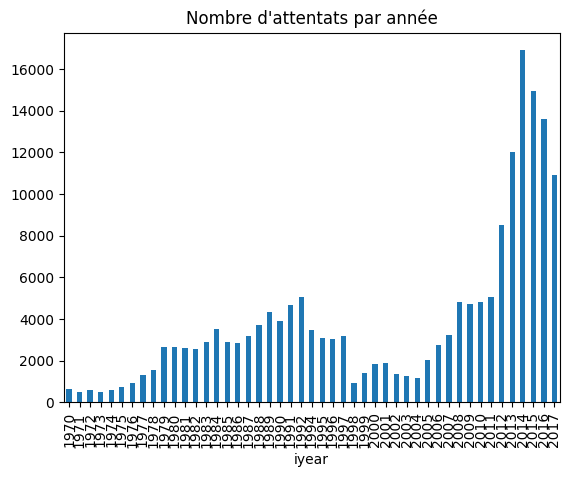

In [6]:
 # On regarde le nombre d'attentats par année pour voir comment évolue le terrorisme au fil des années

#On récupère le nombre d'attentats par année dans la variable "YearCount"

YearCount = df[["eventid","iyear"]].groupby('iyear').count()

#On affiche le bar chart du nombre d'attentats par année

YearCount.plot(kind='bar', legend=False, title="Nombre d'attentats par année")

#On créer une liste qui contient le nombre d'attentats par année pour chaque année

YearCountList = YearCount.values.tolist()

print(YearCountList)

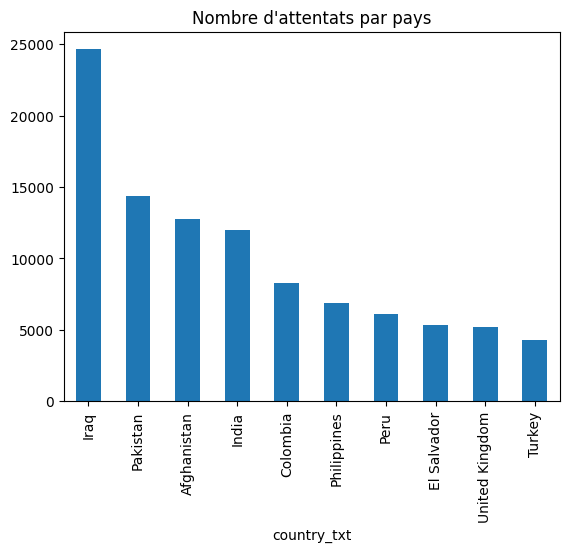

In [11]:
# On regarde le nombre d'attentats par pays pour voir quel pays est le plus touché

#On récupère le nombre d'attentats par pays dans la variable "CountryCount"

CountryCount = df[["eventid","country_txt"]].groupby('country_txt').count()

# on trie les pays par ordre décroissant de nombre d'attentats

CountryCount = CountryCount.sort_values(by='eventid', ascending=False)

# on crée un bar chart du nombre d'attentats par pays pour les 10 pays les plus touchés

CountryCount.head(10).plot(kind='bar', legend=False, title="Nombre d'attentats par pays")

# on crée un dataframe qui contient le nom des pays et le nombre d'attentats pour tous les pays

CountryRisk = pd.DataFrame(CountryCount)

CountryRisk.to_csv("CountryRisk.csv")



In [7]:
def create_heatmap_for_region(region_data, region_name):
    # Créer une carte centrée sur les coordonnées moyennes de la région
    map_center = [region_data['latitude'].mean(), region_data['longitude'].mean()]
    region_map = folium.Map(location=map_center, zoom_start=4)

    # Préparez les données pour la heatmap
    heat_data = [[row['latitude'], row['longitude']] for index, row in region_data.iterrows()]

    # Ajoutez la heatmap à la carte
    HeatMap(heat_data).add_to(region_map)

    # Sauvegarder la heatmap dans un fichier HTML
    region_map.save(f'{region_name}_heatmap.html')

    print(f'{region_name} heatmap created')


In [8]:
regions = Trait['region_txt'].unique()
for region in regions:
    region_data = Trait[Trait['region_txt'] == region]
    create_heatmap_for_region(region_data, region)


Central America & Caribbean heatmap created
North America heatmap created
Southeast Asia heatmap created
Western Europe heatmap created
East Asia heatmap created
South America heatmap created
Eastern Europe heatmap created
Middle East & North Africa heatmap created
Australasia & Oceania heatmap created
South Asia heatmap created
Sub-Saharan Africa heatmap created
Central Asia heatmap created
